<a href="https://colab.research.google.com/github/tomomitanaka00/AI_Safety/blob/main/Ethical_AI_Development_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Adult dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
column_names = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]
data = pd.read_csv(url, names=column_names, skipinitialspace=True, na_values="?")

# Ethical consideration: Assess potential biases in the dataset
print(data['race'].value_counts(normalize=True))
print(data['sex'].value_counts(normalize=True))



race
White                 0.854274
Black                 0.095943
Asian-Pac-Islander    0.031909
Amer-Indian-Eskimo    0.009551
Other                 0.008323
Name: proportion, dtype: float64
sex
Male      0.669205
Female    0.330795
Name: proportion, dtype: float64


In [2]:
!pip install imbalanced-learn


race
White                 0.854274
Black                 0.095943
Asian-Pac-Islander    0.031909
Amer-Indian-Eskimo    0.009551
Other                 0.008323
Name: proportion, dtype: float64
sex
Male      0.669205
Female    0.330795
Name: proportion, dtype: float64


<ipython-input-3-881934087d86>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['income'] = (data['income'] == '>50K').astype(int)
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and 

Balanced Random Forest Accuracy: 0.8150

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.80      0.87      4503
           1       0.60      0.85      0.70      1530

    accuracy                           0.82      6033
   macro avg       0.77      0.83      0.78      6033
weighted avg       0.85      0.82      0.82      6033



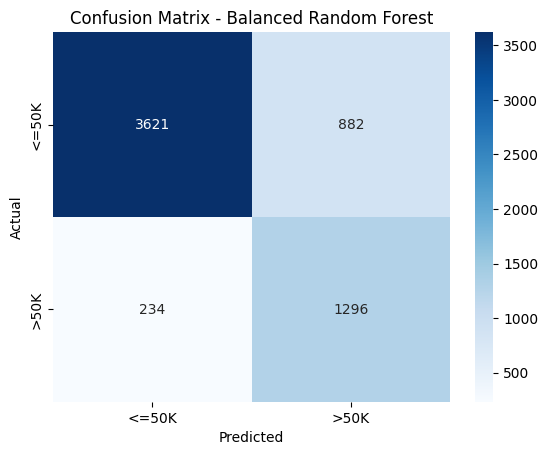

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.ensemble import BalancedRandomForestClassifier

# Load the Adult dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
column_names = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]
data = pd.read_csv(url, names=column_names, skipinitialspace=True, na_values="?")

# Ethical consideration: Assess potential biases in the dataset
print(data['race'].value_counts(normalize=True))
print(data['sex'].value_counts(normalize=True))

# Data preprocessing
data = data.dropna()  # Ethical consideration: Document the impact of dropping missing values

# Feature engineering
data['income'] = (data['income'] == '>50K').astype(int)

# Split the data into features (X) and target (y)
X = data.drop('income', axis=1)
y = data['income']

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, columns=[
    "workclass", "education", "marital-status", "occupation",
    "relationship", "race", "sex", "native-country"
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and train the Balanced Random Forest model
model = BalancedRandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Balanced Random Forest Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Balanced Random Forest')
plt.show()


Class-Weighted Random Forest Accuracy: 0.8503

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4503
           1       0.74      0.64      0.68      1530

    accuracy                           0.85      6033
   macro avg       0.81      0.78      0.79      6033
weighted avg       0.85      0.85      0.85      6033



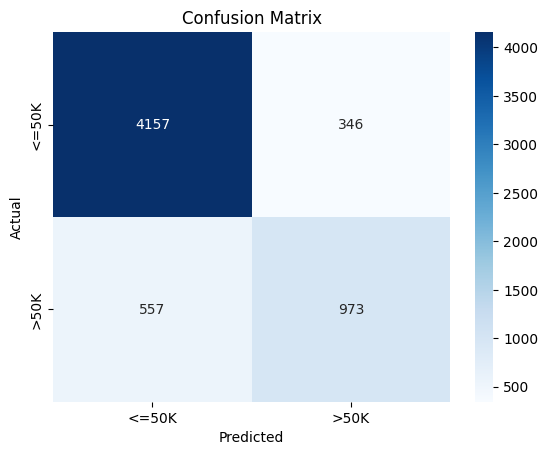

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Adult dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
column_names = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]
data = pd.read_csv(url, names=column_names, skipinitialspace=True, na_values="?")

# Data preprocessing
data = data.dropna()  # Drop missing values
data['income'] = (data['income'] == '>50K').astype(int)  # Encode target variable

# One-hot encode categorical variables
X = data.drop('income', axis=1)
y = data['income']
X_encoded = pd.get_dummies(X, columns=[
    "workclass", "education", "marital-status", "occupation",
    "relationship", "race", "sex", "native-country"
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Compute class weights
class_weights = {0: len(y_train) / (2 * np.bincount(y_train)[0]),
                 1: len(y_train) / (2 * np.bincount(y_train)[1])}

# Train a RandomForestClassifier with class weights
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight=class_weights)
model.fit(X_train_scaled, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Class-Weighted Random Forest Accuracy: {accuracy:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [10]:
!pip install aif360
!pip install tensorflow aif360


In [8]:
from aif360.datasets import BinaryLabelDataset
from aif360.metrics import BinaryLabelDatasetMetric

# Ensure your X_test and y_test are combined into a DataFrame compatible with AIF360
X_test['income'] = y_test

# Make predictions
y_pred = model.predict(X_test_scaled)  # Make sure to use the scaled version

# Create a DataFrame for the predictions to work with AIF360
X_test['predicted_income'] = y_pred

# Ethical consideration: Evaluate fairness across different groups
# The sensitive feature here is 'sex_Female'
sensitive_feature = 'sex_Female'
# Create BinaryLabelDataset for original and predicted datasets
test_dataset = BinaryLabelDataset(df=X_test, label_names=['income'], protected_attribute_names=[sensitive_feature])
predicted_dataset = BinaryLabelDataset(df=X_test.drop(columns=['income']).assign(income=y_pred),
                                       label_names=['income'], protected_attribute_names=[sensitive_feature])

# Calculate fairness metrics
metric = BinaryLabelDatasetMetric(predicted_dataset,
                                  unprivileged_groups=[{sensitive_feature: 0}],
                                  privileged_groups=[{sensitive_feature: 1}])

print(f"Disparate impact: {metric.disparate_impact()}")
print(f"Statistical parity difference: {metric.statistical_parity_difference()}")


pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'
pip install 'aif360[inFairness]'
pip install 'aif360[Reductions]'


Disparate impact: 3.0278441098893936
Statistical parity difference: 0.18716970111676712


Random Forest Accuracy with Reweighted Loss: 0.8510

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4503
           1       0.74      0.64      0.69      1530

    accuracy                           0.85      6033
   macro avg       0.81      0.78      0.79      6033
weighted avg       0.85      0.85      0.85      6033



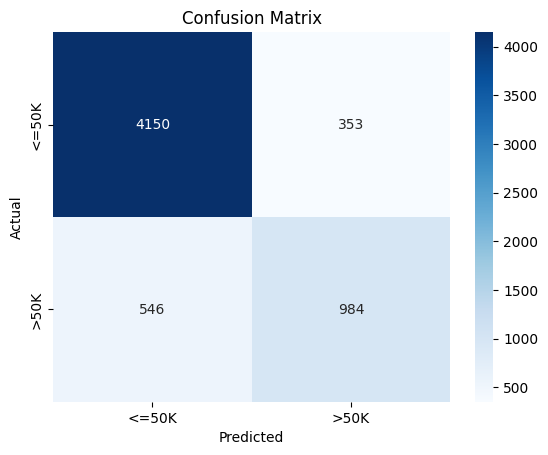

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Adult dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
column_names = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]
data = pd.read_csv(url, names=column_names, skipinitialspace=True, na_values="?")

# Data preprocessing
data = data.dropna()  # Drop missing values
data['income'] = (data['income'] == '>50K').astype(int)  # Encode target variable

# One-hot encode categorical variables
X = data.drop('income', axis=1)
y = data['income']
X_encoded = pd.get_dummies(X, columns=[
    "workclass", "education", "marital-status", "occupation",
    "relationship", "race", "sex", "native-country"
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Calculate class weights manually based on demographic groups (e.g., sex)
# Assuming 'sex_Female' is the sensitive feature.
group_weights = {
    (0, 0): 1.0,  # Male, <=50K
    (0, 1): 1.0,  # Male, >50K
    (1, 0): 1.0,  # Female, <=50K
    (1, 1): 1.0   # Female, >50K
}

# Adjust weights to address fairness (e.g., boost the weight for underrepresented groups)
group_weights[(1, 1)] = 2.0  # Example: Increase weight for Female, >50K

# Create a weight vector for the training data
weights = np.ones(len(y_train))
for i in range(len(y_train)):
    sex_female = X_train.iloc[i]['sex_Female']
    label = y_train.iloc[i]
    weights[i] = group_weights[(sex_female, label)]

# Train a RandomForestClassifier with sample weights
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train, sample_weight=weights)

# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy with Reweighted Loss: {accuracy:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [16]:
from aif360.datasets import BinaryLabelDataset
from aif360.metrics import BinaryLabelDatasetMetric, ClassificationMetric
from sklearn.preprocessing import LabelBinarizer

# Combine X_test and y_test for fairness evaluation
X_test_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_test_df['income'] = y_test.values

# Specify the protected attribute
protected_attribute = 'sex_Female'  # Adjust based on your dataset

# Convert to BinaryLabelDataset
test_dataset = BinaryLabelDataset(df=X_test_df, label_names=['income'], protected_attribute_names=[protected_attribute])

# Predicted labels
lb = LabelBinarizer()
y_pred_binary = lb.fit_transform(y_pred)

# Create a dataset with predicted labels
test_dataset_pred = test_dataset.copy(deepcopy=True)
test_dataset_pred.labels = y_pred_binary

# Calculate fairness metrics
metric_orig_test = ClassificationMetric(test_dataset, test_dataset_pred,
                                        privileged_groups=[{protected_attribute: 1}],
                                        unprivileged_groups=[{protected_attribute: 0}])

# Disparate impact
disparate_impact = metric_orig_test.disparate_impact()
print(f"Disparate Impact: {disparate_impact}")

# Statistical parity difference
statistical_parity_difference = metric_orig_test.statistical_parity_difference()
print(f"Statistical Parity Difference: {statistical_parity_difference}")

# Additional metrics
equal_opportunity_difference = metric_orig_test.equal_opportunity_difference()
print(f"Equal Opportunity Difference: {equal_opportunity_difference}")

average_odds_difference = metric_orig_test.average_odds_difference()
print(f"Average Odds Difference: {average_odds_difference}")


Disparate Impact: nan
Statistical Parity Difference: nan
Equal Opportunity Difference: nan
Average Odds Difference: nan


/usr/local/lib/python3.10/dist-packages/aif360/metrics/classification_metric.py:673: RuntimeWarning: invalid value encountered in scalar divide
  return (self.num_pred_positives(privileged=privileged)
/usr/local/lib/python3.10/dist-packages/aif360/metrics/classification_metric.py:278: RuntimeWarning: invalid value encountered in scalar divide
  TPR=TP / P, TNR=TN / N, FPR=FP / N, FNR=FN / P,
/usr/local/lib/python3.10/dist-packages/aif360/metrics/classification_metric.py:279: RuntimeWarning: invalid value encountered in scalar divide
  GTPR=GTP / P, GTNR=GTN / N, GFPR=GFP / N, GFNR=GFN / P,


In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow.compat.v1 as tf
from aif360.datasets import BinaryLabelDataset
from aif360.metrics import ClassificationMetric
from aif360.algorithms.inprocessing import AdversarialDebiasing

tf.disable_eager_execution()  # For TensorFlow v1 compatibility

# Load and preprocess the Adult dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
column_names = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]
data = pd.read_csv(url, names=column_names, skipinitialspace=True, na_values="?")
data = data.dropna()
data['income'] = (data['income'] == '>50K').astype(int)

# One-hot encode categorical variables
X = data.drop('income', axis=1)
y = data['income']
X_encoded = pd.get_dummies(X, columns=[
    "workclass", "education", "marital-status", "occupation",
    "relationship", "race", "sex", "native-country"
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to DataFrame to match the format expected by AIF360
X_test_df = pd.DataFrame(X_test_scaled, columns=X_encoded.columns)
X_test_df['income'] = y_test.values  # Add income back to the DataFrame

# Create BinaryLabelDataset for AIF360
test_dataset = BinaryLabelDataset(df=X_test_df, label_names=['income'], protected_attribute_names=['sex_Female'])

# Define privileged and unprivileged groups
privileged_groups = [{'sex_Female': 1}]
unprivileged_groups = [{'sex_Female': 0}]

# Hyperparameter tuning variables
adversarial_loss_weights = [0.1, 0.5, 1.0]
epochs_list = [50, 100]

best_accuracy = 0
best_params = {}

# Loop over different combinations of hyperparameters
for adv_loss_weight in adversarial_loss_weights:
    for epochs in epochs_list:
        print(f"\nTraining with adv_loss_weight={adv_loss_weight}, epochs={epochs}")

        # Reset TensorFlow graph
        tf.reset_default_graph()

        sess = tf.Session()
        debiased_model = AdversarialDebiasing(privileged_groups=privileged_groups,
                                              unprivileged_groups=unprivileged_groups,
                                              scope_name='debiased_classifier',
                                              sess=sess,
                                              num_epochs=epochs,
                                              adversary_loss_weight=adv_loss_weight,
                                              batch_size=128,
                                              classifier_num_hidden_units=200,
                                              debias=True)

        # Train the model
        debiased_model.fit(test_dataset)

        # Make predictions
        test_dataset_pred = debiased_model.predict(test_dataset)
        y_pred = test_dataset_pred.labels

        # Evaluate model performance
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy: {accuracy:.4f}")

        # Evaluate fairness metrics
        metric = ClassificationMetric(test_dataset, test_dataset_pred,
                                      privileged_groups=privileged_groups,
                                      unprivileged_groups=unprivileged_groups)
        disparate_impact = metric.disparate_impact()
        statistical_parity_difference = metric.statistical_parity_difference()
        equal_opportunity_difference = metric.equal_opportunity_difference()
        average_odds_difference = metric.average_odds_difference()

        print(f"Disparate Impact: {disparate_impact}")
        print(f"Statistical Parity Difference: {statistical_parity_difference}")
        print(f"Equal Opportunity Difference: {equal_opportunity_difference}")
        print(f"Average Odds Difference: {average_odds_difference}")

        # Track the best performing model
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = {
                'adversarial_loss_weight': adv_loss_weight,
                'epochs': epochs,
                'disparate_impact': disparate_impact,
                'statistical_parity_difference': statistical_parity_difference,
                'equal_opportunity_difference': equal_opportunity_difference,
                'average_odds_difference': average_odds_difference
            }

        # Close the session
        sess.close()

# Print the best hyperparameters
print("\nBest Hyperparameters:")
print(f"Adversarial Loss Weight: {best_params['adversarial_loss_weight']}")
print(f"Epochs: {best_params['epochs']}")
print(f"Accuracy: {best_accuracy:.4f}")
print(f"Disparate Impact: {best_params['disparate_impact']}")
print(f"Statistical Parity Difference: {best_params['statistical_parity_difference']}")
print(f"Equal Opportunity Difference: {best_params['equal_opportunity_difference']}")
print(f"Average Odds Difference: {best_params['average_odds_difference']}")



Training with adv_loss_weight=0.1, epochs=50
epoch 0; iter: 0; batch classifier loss: 0.735781; batch adversarial loss: 0.632608
epoch 1; iter: 0; batch classifier loss: 0.377213; batch adversarial loss: 0.586531
epoch 2; iter: 0; batch classifier loss: 0.346230; batch adversarial loss: 0.574954
epoch 3; iter: 0; batch classifier loss: 0.372520; batch adversarial loss: 0.570083
epoch 4; iter: 0; batch classifier loss: 0.302859; batch adversarial loss: 0.567276
epoch 5; iter: 0; batch classifier loss: 0.405500; batch adversarial loss: 0.496436
epoch 6; iter: 0; batch classifier loss: 0.321034; batch adversarial loss: 0.505073
epoch 7; iter: 0; batch classifier loss: 0.398607; batch adversarial loss: 0.478409
epoch 8; iter: 0; batch classifier loss: 0.386633; batch adversarial loss: 0.521511
epoch 9; iter: 0; batch classifier loss: 0.378224; batch adversarial loss: 0.521197
epoch 10; iter: 0; batch classifier loss: 0.370581; batch adversarial loss: 0.503115
epoch 11; iter: 0; batch clas

/usr/local/lib/python3.10/dist-packages/aif360/metrics/classification_metric.py:673: RuntimeWarning: invalid value encountered in scalar divide
  return (self.num_pred_positives(privileged=privileged)
/usr/local/lib/python3.10/dist-packages/aif360/metrics/classification_metric.py:278: RuntimeWarning: invalid value encountered in scalar divide
  TPR=TP / P, TNR=TN / N, FPR=FP / N, FNR=FN / P,
/usr/local/lib/python3.10/dist-packages/aif360/metrics/classification_metric.py:279: RuntimeWarning: invalid value encountered in scalar divide
  GTPR=GTP / P, GTNR=GTN / N, GFPR=GFP / N, GFNR=GFN / P,


epoch 0; iter: 0; batch classifier loss: 0.916250; batch adversarial loss: 0.547107
epoch 1; iter: 0; batch classifier loss: 0.451906; batch adversarial loss: 0.560713
epoch 2; iter: 0; batch classifier loss: 0.431297; batch adversarial loss: 0.569149
epoch 3; iter: 0; batch classifier loss: 0.403242; batch adversarial loss: 0.567632
epoch 4; iter: 0; batch classifier loss: 0.410131; batch adversarial loss: 0.620555
epoch 5; iter: 0; batch classifier loss: 0.429854; batch adversarial loss: 0.577903
epoch 6; iter: 0; batch classifier loss: 0.358130; batch adversarial loss: 0.538584
epoch 7; iter: 0; batch classifier loss: 0.391381; batch adversarial loss: 0.495638
epoch 8; iter: 0; batch classifier loss: 0.435604; batch adversarial loss: 0.512910
epoch 9; iter: 0; batch classifier loss: 0.316201; batch adversarial loss: 0.484791
epoch 10; iter: 0; batch classifier loss: 0.349423; batch adversarial loss: 0.439553
epoch 11; iter: 0; batch classifier loss: 0.329772; batch adversarial loss:

/usr/local/lib/python3.10/dist-packages/aif360/metrics/classification_metric.py:673: RuntimeWarning: invalid value encountered in scalar divide
  return (self.num_pred_positives(privileged=privileged)
/usr/local/lib/python3.10/dist-packages/aif360/metrics/classification_metric.py:278: RuntimeWarning: invalid value encountered in scalar divide
  TPR=TP / P, TNR=TN / N, FPR=FP / N, FNR=FN / P,
/usr/local/lib/python3.10/dist-packages/aif360/metrics/classification_metric.py:279: RuntimeWarning: invalid value encountered in scalar divide
  GTPR=GTP / P, GTNR=GTN / N, GFPR=GFP / N, GFNR=GFN / P,


Disparate Impact: nan
Statistical Parity Difference: nan
Equal Opportunity Difference: nan
Average Odds Difference: nan

Training with adv_loss_weight=0.5, epochs=50
epoch 0; iter: 0; batch classifier loss: 0.719662; batch adversarial loss: 0.595828
epoch 1; iter: 0; batch classifier loss: 0.381026; batch adversarial loss: 0.630808
epoch 2; iter: 0; batch classifier loss: 0.336818; batch adversarial loss: 0.626411
epoch 3; iter: 0; batch classifier loss: 0.378203; batch adversarial loss: 0.583748
epoch 4; iter: 0; batch classifier loss: 0.313912; batch adversarial loss: 0.568876
epoch 5; iter: 0; batch classifier loss: 0.315092; batch adversarial loss: 0.590652
epoch 6; iter: 0; batch classifier loss: 0.252307; batch adversarial loss: 0.593023
epoch 7; iter: 0; batch classifier loss: 0.405809; batch adversarial loss: 0.466866
epoch 8; iter: 0; batch classifier loss: 0.342695; batch adversarial loss: 0.450388
epoch 9; iter: 0; batch classifier loss: 0.459284; batch adversarial loss: 0.5

/usr/local/lib/python3.10/dist-packages/aif360/metrics/classification_metric.py:673: RuntimeWarning: invalid value encountered in scalar divide
  return (self.num_pred_positives(privileged=privileged)
/usr/local/lib/python3.10/dist-packages/aif360/metrics/classification_metric.py:278: RuntimeWarning: invalid value encountered in scalar divide
  TPR=TP / P, TNR=TN / N, FPR=FP / N, FNR=FN / P,
/usr/local/lib/python3.10/dist-packages/aif360/metrics/classification_metric.py:279: RuntimeWarning: invalid value encountered in scalar divide
  GTPR=GTP / P, GTNR=GTN / N, GFPR=GFP / N, GFNR=GFN / P,


epoch 0; iter: 0; batch classifier loss: 0.670210; batch adversarial loss: 0.585025
epoch 1; iter: 0; batch classifier loss: 0.466197; batch adversarial loss: 0.697277
epoch 2; iter: 0; batch classifier loss: 0.531978; batch adversarial loss: 0.683580
epoch 3; iter: 0; batch classifier loss: 0.469974; batch adversarial loss: 0.651455
epoch 4; iter: 0; batch classifier loss: 0.551205; batch adversarial loss: 0.581583
epoch 5; iter: 0; batch classifier loss: 0.365641; batch adversarial loss: 0.597345
epoch 6; iter: 0; batch classifier loss: 0.554572; batch adversarial loss: 0.555786
epoch 7; iter: 0; batch classifier loss: 0.539796; batch adversarial loss: 0.527287
epoch 8; iter: 0; batch classifier loss: 0.498342; batch adversarial loss: 0.515791
epoch 9; iter: 0; batch classifier loss: 0.456816; batch adversarial loss: 0.501175
epoch 10; iter: 0; batch classifier loss: 0.421002; batch adversarial loss: 0.485032
epoch 11; iter: 0; batch classifier loss: 0.418081; batch adversarial loss:

/usr/local/lib/python3.10/dist-packages/aif360/metrics/classification_metric.py:673: RuntimeWarning: invalid value encountered in scalar divide
  return (self.num_pred_positives(privileged=privileged)
/usr/local/lib/python3.10/dist-packages/aif360/metrics/classification_metric.py:278: RuntimeWarning: invalid value encountered in scalar divide
  TPR=TP / P, TNR=TN / N, FPR=FP / N, FNR=FN / P,
/usr/local/lib/python3.10/dist-packages/aif360/metrics/classification_metric.py:279: RuntimeWarning: invalid value encountered in scalar divide
  GTPR=GTP / P, GTNR=GTN / N, GFPR=GFP / N, GFNR=GFN / P,


epoch 0; iter: 0; batch classifier loss: 0.768432; batch adversarial loss: 0.275104
epoch 1; iter: 0; batch classifier loss: 0.647663; batch adversarial loss: 0.773737
epoch 2; iter: 0; batch classifier loss: 0.830848; batch adversarial loss: 0.918958
epoch 3; iter: 0; batch classifier loss: 0.867774; batch adversarial loss: 0.825033
epoch 4; iter: 0; batch classifier loss: 0.817447; batch adversarial loss: 0.849064
epoch 5; iter: 0; batch classifier loss: 0.848262; batch adversarial loss: 0.670279
epoch 6; iter: 0; batch classifier loss: 0.735644; batch adversarial loss: 0.673787
epoch 7; iter: 0; batch classifier loss: 0.657483; batch adversarial loss: 0.622223
epoch 8; iter: 0; batch classifier loss: 0.434021; batch adversarial loss: 0.597987
epoch 9; iter: 0; batch classifier loss: 0.380717; batch adversarial loss: 0.572226
epoch 10; iter: 0; batch classifier loss: 0.631691; batch adversarial loss: 0.499606
epoch 11; iter: 0; batch classifier loss: 0.623059; batch adversarial loss:

/usr/local/lib/python3.10/dist-packages/aif360/metrics/classification_metric.py:673: RuntimeWarning: invalid value encountered in scalar divide
  return (self.num_pred_positives(privileged=privileged)
/usr/local/lib/python3.10/dist-packages/aif360/metrics/classification_metric.py:278: RuntimeWarning: invalid value encountered in scalar divide
  TPR=TP / P, TNR=TN / N, FPR=FP / N, FNR=FN / P,
/usr/local/lib/python3.10/dist-packages/aif360/metrics/classification_metric.py:279: RuntimeWarning: invalid value encountered in scalar divide
  GTPR=GTP / P, GTNR=GTN / N, GFPR=GFP / N, GFNR=GFN / P,


epoch 0; iter: 0; batch classifier loss: 0.865190; batch adversarial loss: 0.544782
epoch 1; iter: 0; batch classifier loss: 0.540431; batch adversarial loss: 0.684327
epoch 2; iter: 0; batch classifier loss: 0.569160; batch adversarial loss: 0.651027
epoch 3; iter: 0; batch classifier loss: 0.427478; batch adversarial loss: 0.631851
epoch 4; iter: 0; batch classifier loss: 0.430154; batch adversarial loss: 0.607702
epoch 5; iter: 0; batch classifier loss: 0.359750; batch adversarial loss: 0.674640
epoch 6; iter: 0; batch classifier loss: 0.503106; batch adversarial loss: 0.668285
epoch 7; iter: 0; batch classifier loss: 0.602863; batch adversarial loss: 0.547628
epoch 8; iter: 0; batch classifier loss: 0.405504; batch adversarial loss: 0.618216
epoch 9; iter: 0; batch classifier loss: 0.432153; batch adversarial loss: 0.561819
epoch 10; iter: 0; batch classifier loss: 0.377786; batch adversarial loss: 0.576079
epoch 11; iter: 0; batch classifier loss: 0.366430; batch adversarial loss:

/usr/local/lib/python3.10/dist-packages/aif360/metrics/classification_metric.py:673: RuntimeWarning: invalid value encountered in scalar divide
  return (self.num_pred_positives(privileged=privileged)
/usr/local/lib/python3.10/dist-packages/aif360/metrics/classification_metric.py:278: RuntimeWarning: invalid value encountered in scalar divide
  TPR=TP / P, TNR=TN / N, FPR=FP / N, FNR=FN / P,
/usr/local/lib/python3.10/dist-packages/aif360/metrics/classification_metric.py:279: RuntimeWarning: invalid value encountered in scalar divide
  GTPR=GTP / P, GTNR=GTN / N, GFPR=GFP / N, GFNR=GFN / P,


In [21]:
!pip install mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.3/26.3 MB 65.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 75.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.8/538.8 kB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [22]:
import mlflow
from aif360.datasets import BinaryLabelDataset
from aif360.metrics import BinaryLabelDatasetMetric
from sklearn.metrics import accuracy_score

# Assuming 'model' is already trained and 'X_test', 'y_test' are your test datasets
y_pred = model.predict(X_test)

# Log model and metrics
with mlflow.start_run():
    mlflow.sklearn.log_model(model, "random_forest_model")
    mlflow.log_metric("accuracy", accuracy_score(y_test, y_pred))

    # Convert y_test to DataFrame for proper merging
    y_test_df = pd.DataFrame(y_test, columns=['income'])

    # Create BinaryLabelDataset for fairness metrics
    test_dataset = BinaryLabelDataset(df=pd.concat([X_test, y_test_df], axis=1),
                                      label_names=['income'],
                                      protected_attribute_names=['sex_Female'])
    metric = BinaryLabelDatasetMetric(test_dataset,
                                      unprivileged_groups=[{'sex_Female': 0}],
                                      privileged_groups=[{'sex_Female': 1}])

    mlflow.log_metric("disparate_impact", metric.disparate_impact())
    mlflow.log_metric("statistical_parity_difference", metric.statistical_parity_difference())

print("Model and metrics logged to MLflow")

# Simulate model monitoring
def monitor_model_performance(model, X, y, sensitive_feature):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)

    y_df = pd.DataFrame(y, columns=['income'])
    dataset = BinaryLabelDataset(df=pd.concat([X, y_df], axis=1),
                                 label_names=['income'],
                                 protected_attribute_names=[sensitive_feature])
    metric = BinaryLabelDatasetMetric(dataset,
                                      unprivileged_groups=[{sensitive_feature: 0}],
                                      privileged_groups=[{sensitive_feature: 1}])

    return {
        'accuracy': accuracy,
        'disparate_impact': metric.disparate_impact(),
        'statistical_parity_difference': metric.statistical_parity_difference()
    }

# Simulate periodic monitoring
for i in range(3):  # Simulate three monitoring periods
    print(f"Monitoring period {i+1}:")
    metrics = monitor_model_performance(model, X_test, y_test, 'sex_Female')
    print(metrics)
    print()

# Ethical consideration: Set up alerts for when fairness metrics cross certain thresholds
if metrics['disparate_impact'] < 0.8 or metrics['disparate_impact'] > 1.2:
    print("ALERT: Disparate impact outside acceptable range!")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:32: UserWarning: Setuptools is replacing distutils. Support for replacing an already imported distutils is deprecated. In the future, this condition will fail. Register concerns at https://github.com/pypa/setuptools/issues/new?template=distutils-deprecation.yml
  warnings.warn(
2024/08/22 02:34:40 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


Model and metrics logged to MLflow
Monitoring period 1:


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


{'accuracy': 0.7807061163600199, 'disparate_impact': 2.837426326129666, 'statistical_parity_difference': 0.2080105274863773}

Monitoring period 2:


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


{'accuracy': 0.7807061163600199, 'disparate_impact': 2.837426326129666, 'statistical_parity_difference': 0.2080105274863773}

Monitoring period 3:
{'accuracy': 0.7807061163600199, 'disparate_impact': 2.837426326129666, 'statistical_parity_difference': 0.2080105274863773}

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(




ALERT: Disparate impact outside acceptable range!
